#### Access OpenAI library

In [396]:
import openai
openai.api_key = ""

# list models
models = openai.Model.list()

# print the first model's id
print(models.data[0].id)



whisper-1


### 1. Singular Approach

In [42]:
# imports
import pandas as pd
import tiktoken

from openai.embeddings_utils import get_embedding

In [43]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [164]:
import pandas as pd

file = "Petromax competitors_copy.xlsx"

#corpus = pd.read_excel(file, sheet_name="Sheet1", header=None)
corpus = pd.read_excel(file, sheet_name="non-branded")


In [220]:
df_subset = corpus

df_subset

,Petromax,Feuerhand,BBQ-toro,Webergrill,Coleman,Napoleon,Camp chef,valhal
0,dutch oven,NaN,NaN,gasgrill,NaN,grill,NaN,outdoor
1,raketenofen,sturmlaterne,dutch oven,outdoor küche,zelt,gasgrill,dutch oven,dutch oven
2,atago,276,dutch oven reinigen,pizzastein,zelte,NaN,pizza ofen,NaN
3,lampe,pyron,raketenofen,grill gas,kühlbox,rogue 425,grill box,feuerpfanne
4,ft9,grillplatte,bbq torro,grill,benzinkocher,freestyle 365,plancha grillplatte,holzkiste outdoor
...,...,...,...,...,...,...,...,...
942,NaN,NaN,NaN,NaN,schlafsack für camping,NaN,NaN,NaN
943,NaN,NaN,NaN,NaN,ersatzteile campingaz,NaN,NaN,NaN
944,NaN,NaN,NaN,NaN,3 mannzelt,NaN,NaN,NaN
945,NaN,NaN,NaN,NaN,luftzelt 8 personen,NaN,NaN,NaN


In [229]:
# Create a new DataFrame to store the modified column values
df_tidy = pd.DataFrame()

for column in df_subset.columns:
    df_tidy[column] = df_subset[column].dropna().reset_index(drop=True)
df_tidy = df_tidy.iloc[0:51, ]
df_tidy 

,Petromax,Feuerhand,BBQ-toro,Webergrill,Coleman,Napoleon,Camp chef,valhal
0,dutch oven,sturmlaterne,dutch oven,gasgrill,zelt,grill,dutch oven,outdoor
1,raketenofen,276,dutch oven reinigen,outdoor küche,zelte,gasgrill,pizza ofen,dutch oven
2,atago,pyron,raketenofen,pizzastein,kühlbox,rogue 425,grill box,feuerpfanne
3,lampe,grillplatte,bbq torro,grill gas,benzinkocher,freestyle 365,plancha grillplatte,holzkiste outdoor
4,ft9,petroleumlampe,raketenofen 2,grill,events shelter,rogue se 525,camp pizza,feuertopf rezepte
5,hk 500,laterne,dutch oven rezepte,grillzubehoer,eventshelter,freestyle 425,oval dutch oven,flache pfanne
6,ft6,petromax,dutch oven zubehör,grill ersatzteile,shelter,prestige 500,pellet smoker,feuerpfanne rezepte
7,kühlbox,lampe,dutch oven set,gas grill,pavillon,grill zubehör,dutch oven zubehör,outdoor becher
8,pfanne,sage green,toro grill,gasgrills,kocher,rogue,camp oven,knoblauchgarnelen
9,hk 500 innenraum,sturmlaterne 276,gasgrill,holzkohlegrill,event shelter,rogue se 425,16 dutch oven,dutch oven recipe


In [231]:
df = df_tidy.copy()

import pandas as pd

# Create a new DataFrame to store the embeddings for all brands
df_embeddings = pd.DataFrame()

# Iterate over each column
for column in df.columns:
    # Skip the "embedding" column if it already exists
    if column == "embedding":
        continue
    
    # Create a new column in the df_embeddings DataFrame for the current brand
    embeddings = df[column].apply(lambda x: get_embedding(x, engine=embedding_model))
    df_embeddings[column + "_embedding"] = embeddings
    df_embeddings[column + "_keyword"] = df[column]
    
# Save the embeddings DataFrame to a CSV file
#df_embeddings.to_csv("brand_embeddings.csv")

df_embeddings

,Petromax_embedding,Petromax_keyword,Feuerhand_embedding,Feuerhand_keyword,BBQ-toro_embedding,BBQ-toro_keyword,Webergrill_embedding,Webergrill_keyword,Coleman_embedding,Coleman_keyword,Napoleon_embedding,Napoleon_keyword,Camp chef_embedding,Camp chef_keyword,valhal_embedding,valhal_keyword
0,"[-0.0054853931069374084, -0.027136841788887978...",dutch oven,"[-0.009334716014564037, -0.030347758904099464,...",sturmlaterne,"[-0.0054853931069374084, -0.027136841788887978...",dutch oven,"[-0.0018385450821369886, 0.0025475043803453445...",gasgrill,"[0.003203981788828969, -0.019507428631186485, ...",zelt,"[-0.002918665064498782, -0.008586821146309376,...",grill,"[-0.0054853931069374084, -0.027136841788887978...",dutch oven,"[-0.004729702603071928, -0.004260751884430647,...",outdoor
1,"[-0.015183870680630207, -0.012356159277260303,...",raketenofen,"[-0.007633447181433439, 0.004945025313645601, ...",276,"[0.01610645093023777, -0.02667327970266342, 0....",dutch oven reinigen,"[0.0252104289829731, 0.0034405055921524763, -0...",outdoor küche,"[-0.005158072337508202, -0.011623731814324856,...",zelte,"[-0.0019218962406739593, 0.002512205159291625,...",gasgrill,"[0.021157000213861465, -0.03515894338488579, -...",pizza ofen,"[-0.005496846046298742, -0.02716723456978798, ...",dutch oven
2,"[-0.0135877700522542, -0.014405809342861176, -...",atago,"[-0.0032823807559907436, -0.02478775382041931,...",pyron,"[-0.015199210494756699, -0.012230404652655125,...",raketenofen,"[0.015772927552461624, -0.01875300332903862, 0...",pizzastein,"[-0.008475917391479015, -0.01806923747062683, ...",kühlbox,"[-0.024121953174471855, -0.0036527339834719896...",rogue 425,"[-0.011461530812084675, -0.014737235382199287,...",grill box,"[0.001065788441337645, -0.004654568154364824, ...",feuerpfanne
3,"[-4.3906777136726305e-05, -0.00645660422742366...",lampe,"[0.0026239773724228144, -0.027346663177013397,...",grillplatte,"[-0.021748287603259087, -0.022383878007531166,...",bbq torro,"[0.011855162680149078, 0.0039314208552241325, ...",grill gas,"[-0.016939567402005196, 0.0006610706332139671,...",benzinkocher,"[-0.00362934242002666, -0.008187043480575085, ...",freestyle 365,"[-0.00048611778765916824, -0.01164054963737726...",plancha grillplatte,"[0.008153664879500866, 0.0159675944596529, -0....",holzkiste outdoor
4,"[-0.016922075301408768, -0.004036489874124527,...",ft9,"[0.0033900130074471235, -0.005034211091697216,...",petroleumlampe,"[-0.01163097470998764, -0.007780767511576414, ...",raketenofen 2,"[-0.002918665064498782, -0.008586821146309376,...",grill,"[-0.01239265501499176, -0.028837984427809715, ...",events shelter,"[-0.019482167437672615, -0.005918154958635569,...",rogue se 525,"[0.02083355002105236, -0.028712905943393707, 0...",camp pizza,"[0.005867895670235157, 0.006107472348958254, -...",feuertopf rezepte
5,"[-0.010430357418954372, 0.005290910601615906, ...",hk 500,"[0.0027087947819381952, -0.010390272364020348,...",laterne,"[0.014398874714970589, -0.02931934967637062, 0...",dutch oven rezepte,"[0.014485846273601055, 0.004556978587061167, -...",grillzubehoer,"[-0.004565782379359007, -0.03087075799703598, ...",eventshelter,"[-0.015804164111614227, 0.001290785032324493, ...",freestyle 425,"[-8.738903125049546e-05, -0.03172194957733154,...",oval dutch oven,"[-0.00011117593385279179, 0.007599071599543095...",flache pfanne
6,"[-0.012083630077540874, 0.0009256503544747829,...",ft6,"[-0.02457166276872158, -0.011521873064339161, ...",petromax,"[0.007857478223741055, -0.020668288692831993, ...",dutch oven zubehör,"[0.005978090688586235, -0.002436013426631689, ...",grill ersatzteile,"[-0.001244732877239585, -0.020063448697328568,...",shelter,"[-0.01023542694747448, -0.00998561829328537, -...",prestige 500,"[-0.025567442178726196, -0.0022929846309125423...",pellet smoker,"[0.018935825675725937, 0.0044029587879776955, ...",feuerpfanne rezepte
7,"[-0.008475917391479015, -0.01806923747062683, ...",kühlbox,"[-4.3906777136726305e-05, -0.00645660422742366...",lampe,"[-0.0072001786902

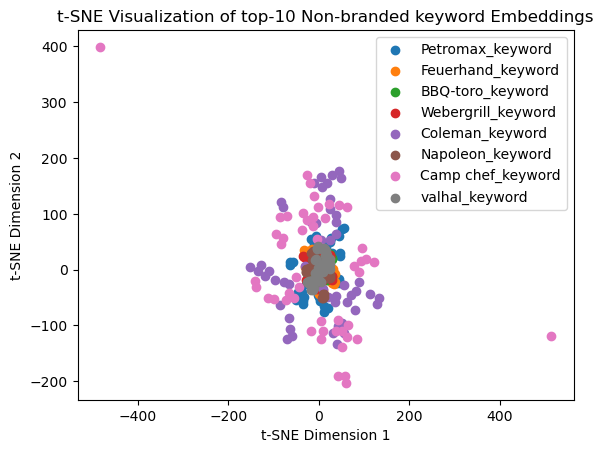

In [232]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the brand embeddings DataFrame
#df_embeddings = pd.read_csv("brand_embeddings.csv", index_col=0)

# Extract the embedding columns and keyword columns for each brand
embedding_columns = [col for col in df_embeddings.columns if col.endswith("_embedding")]
keyword_columns = [col.replace("_embedding", "_keyword") for col in embedding_columns]

# Create a t-SNE model
tsne_model = TSNE(n_components=2, perplexity=5, random_state=42)

# Iterate over each brand
for embedding_col, keyword_col in zip(embedding_columns, keyword_columns):
    # Get the embeddings and keywords for the current brand
    embeddings = np.array(df_embeddings[embedding_col].tolist())
    keywords = df_embeddings[keyword_col].tolist()
    
    # Apply t-SNE on the embeddings
    embeddings_tsne = tsne_model.fit_transform(embeddings)
    
    # Create a scatter plot of the t-SNE embeddings, colored by brand name
    plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], label=keyword_col)
    
# Add legend and labels to the plot
plt.legend()
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of top-10 Non-branded keyword Embeddings")
plt.show()


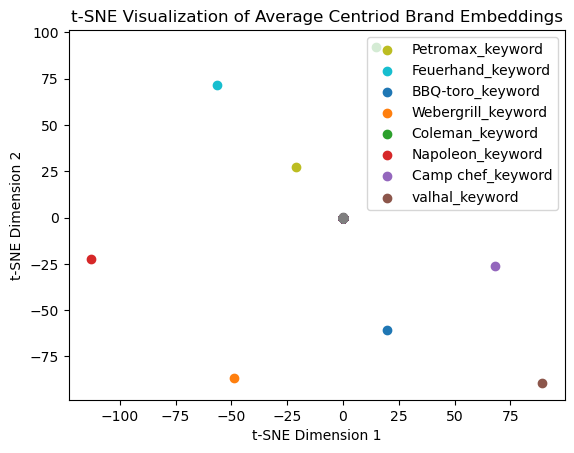

In [233]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the brand embeddings DataFrame
#df_embeddings = pd.read_csv("brand_embeddings.csv", index_col=0)

# Extract the embedding columns and keyword columns for each brand
embedding_columns = [col for col in df_embeddings.columns if col.endswith("_embedding")]
keyword_columns = [col.replace("_embedding", "_keyword") for col in embedding_columns]

# Create a t-SNE model
tsne_model = TSNE(n_components=2, random_state=42, perplexity=5)

# Store the average centroids and brand names for each brand
centroids = []
brand_names = []

# Iterate over each brand
for embedding_col, keyword_col in zip(embedding_columns, keyword_columns):
    # Get the embeddings and keywords for the current brand
    embeddings = np.array(df_embeddings[embedding_col].tolist())
    keywords = df_embeddings[keyword_col].tolist()
    
    # Calculate the centroid of the embeddings
    centroid = np.mean(embeddings, axis=0)
    centroids.append(centroid)
    brand_names.append(keyword_col)
    
    # Create a scatter plot of the t-SNE embeddings, colored by brand name
    plt.scatter(embeddings[:, 0], embeddings[:, 1], label=None)
    
# Convert the centroids and brand names lists to NumPy arrays
centroids = np.array(centroids)
brand_names = np.array(brand_names)

# Apply t-SNE on the centroids
centroids_tsne = tsne_model.fit_transform(centroids)

# Create a scatter plot of the t-SNE centroids and link them to the brand names
for i in range(len(centroids_tsne)):
    plt.scatter(centroids_tsne[i, 0], centroids_tsne[i, 1], marker="o", label=brand_names[i])

# Add legend and labels to the plot
plt.legend()
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Average Centriod Brand Embeddings")
plt.show()


### 2. Cluster Approach

In [234]:
corpus.head()

,Petromax,Feuerhand,BBQ-toro,Webergrill,Coleman,Napoleon,Camp chef,valhal
0,dutch oven,NaN,NaN,gasgrill,NaN,grill,NaN,outdoor
1,raketenofen,sturmlaterne,dutch oven,outdoor küche,zelt,gasgrill,dutch oven,dutch oven
2,atago,276,dutch oven reinigen,pizzastein,zelte,NaN,pizza ofen,NaN
3,lampe,pyron,raketenofen,grill gas,kühlbox,rogue 425,grill box,feuerpfanne
4,ft9,grillplatte,bbq torro,grill,benzinkocher,freestyle 365,plancha grillplatte,holzkiste outdoor


In [95]:
comb_corpus = pd.melt(corpus)
comb_corpus = comb_corpus.dropna(subset="value")
comb_corpus = comb_corpus.iloc[ 0:, 0: ]
comb_corpus

,variable,value
0,Petromax,dutch oven
1,Petromax,feuerschale
2,Petromax,dutch oven rezepte
3,Petromax,ofen
4,Petromax,messer
...,...,...
7095,valhal,feuerpfanne gusseisen
7096,valhal,feuerpfanne rezepte
7097,valhal,pfanne zwei griffe
7098,valhal,plancha outdoor


In [112]:
# get embeddings for each keyword

comb_corpus["embedding"] = comb_corpus.value.apply(lambda x: get_embedding(x, engine=embedding_model))

In [113]:
comb_corpus.to_csv("cluster_embeddings.csv")

In [114]:
datafile_path = "cluster_embeddings.csv"
df_cluster = pd.read_csv(datafile_path)

In [117]:
df_cluster.iloc[0:20, :]

,Unnamed: 0,variable,value,embedding
0,0,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978..."
1,1,Petromax,feuerschale,"[0.00605645589530468, -0.00632665678858757, -0..."
2,2,Petromax,dutch oven rezepte,"[0.014426968060433865, -0.02929319627583027, 0..."
3,3,Petromax,ofen,"[0.002461207564920187, -0.022296609356999397, ..."
4,4,Petromax,messer,"[-0.015967339277267456, -0.0007667244062758982..."
5,5,Petromax,waffeleisen,"[-0.028983324766159058, -0.013830497860908508,..."
6,6,Petromax,briketts,"[-0.028339289128780365, -0.001331714796833694,..."
7,7,Petromax,raketenofen,"[-0.015183870680630207, -0.012356159277260303,..."
8,8,Petromax,kühlbox,"[-0.008578653447329998, -0.018015854060649872,..."
9,9,Petromax,kühltasche,"[-0.006657162681221962, 0.003660151967778802, ..."


In [118]:
import ast

# Convert to a list of lists of floats
matrix = df_cluster.embedding.dropna().apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.nan).dropna().to_numpy()



In [124]:
df_cluster["embedding"] = df_cluster.embedding.apply(eval).apply(np.array)

In [134]:
df_cluster

,Unnamed: 0,variable,value,embedding,Cluster
0,0,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0
1,1,Petromax,feuerschale,"[0.00605645589530468, -0.00632665678858757, -0...",4
2,2,Petromax,dutch oven rezepte,"[0.014426968060433865, -0.02929319627583027, 0...",0
3,3,Petromax,ofen,"[0.002461207564920187, -0.022296609356999397, ...",4
4,4,Petromax,messer,"[-0.015967339277267456, -0.0007667244062758982...",4
...,...,...,...,...,...
5585,7095,valhal,feuerpfanne gusseisen,"[-0.00016610555758234113, 0.006395578384399414...",4
5586,7096,valhal,feuerpfanne rezepte,"[0.018935825675725937, 0.0044029587879776955, ...",4
5587,7097,valhal,pfanne zwei griffe,"[0.008460801094770432, 0.021709242835640907, 0...",4
5588,7098,valhal,plancha outdoor,"[-0.00992260966449976, -0.005160719621926546, ...",1


In [136]:
matrix = np.vstack(df_cluster.embedding.values)
matrix.shape

(5590, 1536)

In [137]:
matrix

array([[-0.00548539, -0.02713684,  0.01072114, ...,  0.0223464 ,
         0.00176268, -0.02098349],
       [ 0.00605646, -0.00632666, -0.01017537, ..., -0.01215245,
         0.01310804, -0.01202724],
       [ 0.01442697, -0.0292932 ,  0.0039053 , ...,  0.02800287,
         0.00769393, -0.01820187],
       ...,
       [ 0.0084608 ,  0.02170924,  0.0137826 , ...,  0.01810862,
        -0.00078063, -0.01506194],
       [-0.00992261, -0.00516072,  0.00270413, ...,  0.00314078,
         0.00530512, -0.02377851],
       [ 0.00619574, -0.01260318, -0.01939765, ...,  0.00125784,
         0.01062504, -0.02416106]])

In [138]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df_cluster["Cluster"] = labels

C:\Users\FaridSarwari\anaconda5\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [139]:
df_cluster

,Unnamed: 0,variable,value,embedding,Cluster
0,0,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0
1,1,Petromax,feuerschale,"[0.00605645589530468, -0.00632665678858757, -0...",4
2,2,Petromax,dutch oven rezepte,"[0.014426968060433865, -0.02929319627583027, 0...",0
3,3,Petromax,ofen,"[0.002461207564920187, -0.022296609356999397, ...",4
4,4,Petromax,messer,"[-0.015967339277267456, -0.0007667244062758982...",4
...,...,...,...,...,...
5585,7095,valhal,feuerpfanne gusseisen,"[-0.00016610555758234113, 0.006395578384399414...",4
5586,7096,valhal,feuerpfanne rezepte,"[0.018935825675725937, 0.0044029587879776955, ...",4
5587,7097,valhal,pfanne zwei griffe,"[0.008460801094770432, 0.021709242835640907, 0...",4
5588,7098,valhal,plancha outdoor,"[-0.00992260966449976, -0.005160719621926546, ...",1


Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

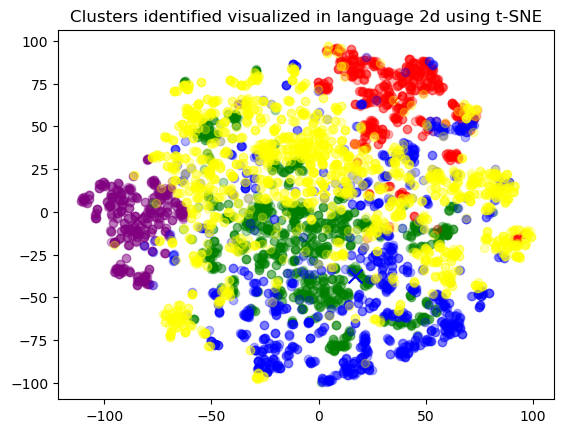

In [141]:
tsne = TSNE(
    n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200
)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue","yellow"]):
    xs = np.array(x)[df_cluster.Cluster == category]
    ys = np.array(y)[df_cluster.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")



In [283]:
df_cluster

,Unnamed: 0,variable,value,embedding,Cluster
0,0,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0
1,1,Petromax,feuerschale,"[0.00605645589530468, -0.00632665678858757, -0...",4
2,2,Petromax,dutch oven rezepte,"[0.014426968060433865, -0.02929319627583027, 0...",0
3,3,Petromax,ofen,"[0.002461207564920187, -0.022296609356999397, ...",4
4,4,Petromax,messer,"[-0.015967339277267456, -0.0007667244062758982...",4
...,...,...,...,...,...
5585,7095,valhal,feuerpfanne gusseisen,"[-0.00016610555758234113, 0.006395578384399414...",4
5586,7096,valhal,feuerpfanne rezepte,"[0.018935825675725937, 0.0044029587879776955, ...",4
5587,7097,valhal,pfanne zwei griffe,"[0.008460801094770432, 0.021709242835640907, 0...",4
5588,7098,valhal,plancha outdoor,"[-0.00992260966449976, -0.005160719621926546, ...",1


#### Assigning Themes to each of the categories found

In [162]:
#Using openAI model to find the general themese within each assigned category

import openai
import time

# Define the completions model
COMPLETIONS_MODEL = "text-davinci-003"

# Function to generate descriptions for each cluster
def generate_cluster_descriptions(df):
    for cluster_id in df_cluster['Cluster'].unique():
        # Filter the DataFrame for the current cluster
        cluster_df = df_cluster[df_cluster['Cluster'] == cluster_id]

        # Extract variables for the current cluster
        variables = cluster_df['variable'].tolist()

        # Generate a prompt using the cluster variables
        prompt = f"Cluster {cluster_id} consists of {', '.join(variables)}."
        
        # Truncate the prompt to fit within the model's maximum context length
        max_prompt_length = 4097 - 100  # Subtracting completion length
        prompt = prompt[:max_prompt_length]

 # Make an API request to generate the description with retries
        retries = 3
        for attempt in range(retries):
            try:
                response = openai.Completion.create(
                    engine=COMPLETIONS_MODEL,
                    prompt=prompt,
                    max_tokens=500  # Adjust the max tokens as per your desired description length
                )
                description = response.choices[0].text.strip()
                break  # Break out of the retry loop if the request is successful
            except openai.error.RateLimitError:
                # Handle rate limiting error by waiting for a short duration
                print("Rate limit exceeded. Retrying in 5 seconds...")
                time.sleep(5)
                continue
            except Exception as e:
                # Handle other types of errors
                print(f"Error occurred: {str(e)}")
                break

        # Print or store the cluster description
        print(f"Cluster {cluster_id} description: {description}")
        print()

# Call the function to generate descriptions for each cluster
generate_cluster_descriptions(df_cluster)


Cluster 0 description: aco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco, BBQ-taco. 

This cluster consists largely of grilling and barbeque tools, and therefore could potentially be marketed to people who enjoy outdoor and indoor grilling and barbequing. Additionally, the cluster could be marketed to those who are trying to start or maintain a backyard setup for grilling and barbecuing.

Cluster 4 description: Cluster 4 is a collection of all Petromax brand products. Petromax is an outdoor lighting and cooking gear manufacturer based in Germany, and is well known for their high quality items designed for rough and rugged outdoor use. The items included in Cluster 4 include lanterns, stoves, fuel, cookware, and accessories. These items are perfect for anyo

In [284]:
file = "keyword_embedding_clusters.xlsx"

#corpus = pd.read_excel(file, sheet_name="Sheet1", header=None)
cluster_data = pd.read_excel(file, sheet_name="Sheet1")
site_visits_data = pd.read_excel(file, sheet_name="All Keywords")


In [285]:
cluster_data

,Unnamed: 0,variable,value,embedding,Cluster
0,0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0
1,1,Petromax,feuerschale,[ 0.00605646 -0.00632666 -0.01017537 ... -0.01...,4
2,2,Petromax,dutch oven rezepte,[ 0.01442697 -0.0292932 0.0039053 ... 0.02...,0
3,3,Petromax,ofen,[ 0.00246121 -0.02229661 -0.00864616 ... 0.00...,4
4,4,Petromax,messer,[-0.01596734 -0.00076672 0.00434099 ... -0.00...,4
...,...,...,...,...,...
5585,5585,valhal,feuerpfanne gusseisen,[-0.00016611 0.00639558 -0.0069752 ... -0.00...,4
5586,5586,valhal,feuerpfanne rezepte,[ 0.01893583 0.00440296 -0.00534423 ... 0.01...,4
5587,5587,valhal,pfanne zwei griffe,[ 0.0084608 0.02170924 0.0137826 ... 0.01...,4
5588,5588,valhal,plancha outdoor,[-0.00992261 -0.00516072 0.00270413 ... 0.00...,1


In [243]:
site_visits_data = site_visits_data.rename(columns={"Petromax" : "variable", "Petromax.1": "value"})
site_visits_data

,variable,value,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Traffic (%)
0,Petromax,dutch oven,dutch oven,1,1,3600,19,0.21,https://www.petromax.de/c/feuertoepfe-dutch-oven,2880,4.24
1,Petromax,raketenofen,raketenofen,1,1,3600,31,0.25,https://www.petromax.de/p/petromax-raketenofen,2880,4.24
2,Petromax,atago,atago,1,1,2900,19,0.24,https://www.petromax.de/p/petromax-atago,2320,3.41
3,Petromax,lampe,lampe,1,1,2400,20,0.21,https://www.petromax.de/p/petromax-petroleumle...,1920,2.82
4,Petromax,ft9,ft9,1,1,2400,20,0.23,https://www.petromax.de/p/feuertopf-ft9-dutch-...,1920,2.82
...,...,...,...,...,...,...,...,...,...,...,...
5067,valhal,feuerpfanne gusseisen,feuerpfanne gusseisen,17,17,50,12,0.45,https://www.valhaloutdoor.com/de/gusseisen/feu...,0,0
5068,valhal,grillpfanne mit deckel,grillpfanne mit deckel,17,17,140,16,0.23,https://www.valhaloutdoor.com/de/vh-lid30-deck...,0,0
5069,valhal,holzkiste mit deckel outdoor,holzkiste mit deckel outdoor,16,16,110,17,0.23,https://www.valhaloutdoor.com/de/vh-box-holzki...,0,0
5070,valhal,outdoor pfanne feuer,outdoor pfanne feuer,14,14,70,4,0.23,https://www.valhaloutdoor.com/de/gusseisen/feu...,0,0


In [286]:
df_cluster

,Unnamed: 0,variable,value,embedding,Cluster
0,0,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0
1,1,Petromax,feuerschale,"[0.00605645589530468, -0.00632665678858757, -0...",4
2,2,Petromax,dutch oven rezepte,"[0.014426968060433865, -0.02929319627583027, 0...",0
3,3,Petromax,ofen,"[0.002461207564920187, -0.022296609356999397, ...",4
4,4,Petromax,messer,"[-0.015967339277267456, -0.0007667244062758982...",4
...,...,...,...,...,...
5585,7095,valhal,feuerpfanne gusseisen,"[-0.00016610555758234113, 0.006395578384399414...",4
5586,7096,valhal,feuerpfanne rezepte,"[0.018935825675725937, 0.0044029587879776955, ...",4
5587,7097,valhal,pfanne zwei griffe,"[0.008460801094770432, 0.021709242835640907, 0...",4
5588,7098,valhal,plancha outdoor,"[-0.00992260966449976, -0.005160719621926546, ...",1


In [248]:
merged_df = pd.merge(cluster_data, site_visits_data, on=['variable', 'value'])
merged_df = merged_df.drop_duplicates(subset=["variable", "value"])
merged_df

,Unnamed: 0,variable,value,embedding,Cluster,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Traffic (%)
0,0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,dutch oven,1,1,3600,19,0.21,https://www.petromax.de/c/feuertoepfe-dutch-oven,2880,4.24
5,1,Petromax,feuerschale,[ 0.00605646 -0.00632666 -0.01017537 ... -0.01...,4,feuerschale,1,1,260,19,0.20,https://www.petromax.de/c/feuerschalen,208,0.3
8,2,Petromax,dutch oven rezepte,[ 0.01442697 -0.0292932 0.0039053 ... 0.02...,0,dutch oven rezepte,1,1,170,24,0.00,https://www.petromax.de/c/rezepte,136,0.2
10,3,Petromax,ofen,[ 0.00246121 -0.02229661 -0.00864616 ... 0.00...,4,ofen,1,1,320,23,0.19,https://www.petromax.de/c/outdoor-ofen,256,0.37
16,4,Petromax,messer,[-0.01596734 -0.00076672 0.00434099 ... -0.00...,4,messer,37,40,33100,44,0.00,https://www.petromax.de/c/besteck-messer,9,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,5485,Camp Chef,pizza professionals,[ 0.0217098 -0.01763576 -0.00682574 ... 0.01...,3,pizza professionals,65,65,50,17,0.00,https://www.campchef-outdoor.de/camp-chef-pro-...,0,0
5476,5486,Camp Chef,größter dutch oven,[-0.00320609 -0.01000096 0.00547332 ... 0.00...,0,größter dutch oven,91,91,50,13,0.18,https://www.campchef-outdoor.de/camp-chef-dutc...,0,0
5477,5487,Camp Chef,33 quadrat,[ 0.00971171 0.00248651 0.00881344 ... 0.00...,3,33 quadrat,23,23,50,22,0.00,https://www.campchef-outdoor.de/13-quadrat-dut...,0,0
5478,5488,Camp Chef,brennholz holland,[-0.01181833 -0.01101143 -0.01259741 ... 0.01...,4,brennholz holland,6,6,40,10,0.19,https://www.campchef-outdoor.de/ovengedroogd-h...,0,0


In [307]:
merged_df_final = pd.merge(merged_df, df_cluster, on=['variable', 'value'])

In [306]:
pd.merge(merged_df, df_cluster, on=['variable', 'value'])

,Unnamed: 0_x,variable,value,embedding_x,Cluster_x,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Traffic (%),Unnamed: 0_y,embedding_y,Cluster_y
0,0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,dutch oven,1,1,3600,19,0.21,https://www.petromax.de/c/feuertoepfe-dutch-oven,2880,4.24,0,"[-0.0054853931069374084, -0.027136841788887978...",0
1,0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,dutch oven,1,1,3600,19,0.21,https://www.petromax.de/c/feuertoepfe-dutch-oven,2880,4.24,33,"[-0.0054853931069374084, -0.027136841788887978...",0
2,0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,dutch oven,1,1,3600,19,0.21,https://www.petromax.de/c/feuertoepfe-dutch-oven,2880,4.24,35,"[-0.0054853931069374084, -0.027136841788887978...",0
3,0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,dutch oven,1,1,3600,19,0.21,https://www.petromax.de/c/feuertoepfe-dutch-oven,2880,4.24,107,"[-0.0054853931069374084, -0.027136841788887978...",0
4,0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,dutch oven,1,1,3600,19,0.21,https://www.petromax.de/c/feuertoepfe-dutch-oven,2880,4.24,108,"[-0.0054853931069374084, -0.027136841788887978...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5386,5396,Napoleon,grill mit kühlschrank,[ 0.02209227 0.00437991 0.01028839 ... 0.01...,1,grill mit kühlschrank,13,13,50,4,0.00,https://www.napoleon.com/de/at/grills/produkte...,0,0,5713,"[0.022092271596193314, 0.004379913676530123, 0...",1
5387,5397,Napoleon,grill räucherbox,[ 0.00330146 -0.02187361 0.00393899 ... -0.00...,1,grill räucherbox,26,26,50,19,0.24,https://www.napoleon.com/de/at/grills/edelstah...,0,0,5714,"[0.003301456570625305, -0.021873613819479942, ...",1
5388,5398,Napoleon,gasgrill schwarz matt,[ 0.01314846 0.00171789 0.00182691 ... -0.00...,1,gasgrill schwarz matt,18,18,50,6,0.23,https://www.napoleon.com/de/de/grills,0,0,5715,"[0.013148460537195206, 0.0017178893322125077, ...",1
5389,5399,Napoleon,3 flammiger gasgrill,[ 0.00338034 0.00236159 -0.02310731 ... -0.00...,1,3 flammiger gasgrill,92,92,50,11,0.56,https://www.napoleon.com/de/de/grills,0,0,5716,"[0.003380341688171029, 0.0023615858517587185, ...",1


In [309]:
df_tidy_kw_data = merged_df_final[['variable', 'value', 'embedding_y', 'Cluster_x', 'Search Volume', 'Traffic']]
df_tidy_kw_data

,variable,value,embedding_y,Cluster_x,Search Volume,Traffic
0,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0,3600,2880
1,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0,3600,2880
2,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0,3600,2880
3,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0,3600,2880
4,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0,3600,2880
...,...,...,...,...,...,...
5386,Napoleon,grill mit kühlschrank,"[0.022092271596193314, 0.004379913676530123, 0...",1,50,0
5387,Napoleon,grill räucherbox,"[0.003301456570625305, -0.021873613819479942, ...",1,50,0
5388,Napoleon,gasgrill schwarz matt,"[0.013148460537195206, 0.0017178893322125077, ...",1,50,0
5389,Napoleon,3 flammiger gasgrill,"[0.003380341688171029, 0.0023615858517587185, ...",1,50,0


In [316]:
df_tidy_kw_data[df_tidy_kw_data.value == "dutch oven"]

,variable,value,embedding_y,Cluster_x,Search Volume,Traffic
0,Petromax,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0,3600,2880
1933,BBQ-toro,dutch oven,"[-0.005486916285008192, -0.027184870094060898,...",0,880,704
2982,Webergrill,dutch oven,"[-0.0054853931069374084, -0.027136841788887978...",0,1900,49


,variable,value,embedding,Cluster,Search Volume,Traffic
0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,3600,2880
5,Petromax,feuerschale,[ 0.00605646 -0.00632666 -0.01017537 ... -0.01...,4,260,208
8,Petromax,dutch oven rezepte,[ 0.01442697 -0.0292932 0.0039053 ... 0.02...,0,170,136
10,Petromax,ofen,[ 0.00246121 -0.02229661 -0.00864616 ... 0.00...,4,320,256
16,Petromax,messer,[-0.01596734 -0.00076672 0.00434099 ... -0.00...,4,33100,9
...,...,...,...,...,...,...
5475,Camp Chef,pizza professionals,[ 0.0217098 -0.01763576 -0.00682574 ... 0.01...,3,50,0
5476,Camp Chef,größter dutch oven,[-0.00320609 -0.01000096 0.00547332 ... 0.00...,0,50,0
5477,Camp Chef,33 quadrat,[ 0.00971171 0.00248651 0.00881344 ... 0.00...,3,50,0
5478,Camp Chef,brennholz holland,[-0.01181833 -0.01101143 -0.01259741 ... 0.01...,4,40,0


In [388]:
import pandas as pd

# Sort the dataframe by 'traffic' column in descending order
sorted_df = merged_df.sort_values('Traffic', ascending=False)

# Group by 'variable' and return the first 10 values in 'value' column for each group
grouped_df = merged_df.groupby('variable').head(20)

# Print the resulting dataframe
grouped_df[grouped_df.variable=="Petromax"]


,variable,value,embedding,Cluster,Search Volume,Traffic
0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,3600,2880
5,Petromax,feuerschale,[ 0.00605646 -0.00632666 -0.01017537 ... -0.01...,4,260,208
8,Petromax,dutch oven rezepte,[ 0.01442697 -0.0292932 0.0039053 ... 0.02...,0,170,136
10,Petromax,ofen,[ 0.00246121 -0.02229661 -0.00864616 ... 0.00...,4,320,256
16,Petromax,messer,[-0.01596734 -0.00076672 0.00434099 ... -0.00...,4,33100,9
17,Petromax,waffeleisen,[-0.02898332 -0.0138305 0.00814313 ... 0.01...,4,390,312
23,Petromax,briketts,[-0.02833929 -0.00133171 -0.01369291 ... 0.00...,4,90,72
26,Petromax,raketenofen,[-0.01518387 -0.01235616 -0.00164754 ... 0.00...,4,3600,2880
31,Petromax,kühlbox,[-0.00857865 -0.01801585 0.0221178 ... 0.00...,4,880,704
43,Petromax,kühltasche,[-0.00665716 0.00366015 0.0359255 ... 0.01...,4,170,136


In [351]:
grouped_df.columns

Index(['Unnamed: 0', 'variable', 'value', 'embedding', 'Cluster', 'Keyword',
       'Position', 'Previous position', 'Search Volume', 'Keyword Difficulty',
       'CPC', 'URL', 'Traffic', 'Traffic (%)'],
      dtype='object')

In [353]:
grouped_df= grouped_df[['variable', 'value', 'embedding', 'Cluster','Search Volume','Traffic']]

In [354]:
grouped_df

,variable,value,embedding,Cluster,Search Volume,Traffic
0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,3600,2880
5,Petromax,feuerschale,[ 0.00605646 -0.00632666 -0.01017537 ... -0.01...,4,260,208
8,Petromax,dutch oven rezepte,[ 0.01442697 -0.0292932 0.0039053 ... 0.02...,0,170,136
10,Petromax,ofen,[ 0.00246121 -0.02229661 -0.00864616 ... 0.00...,4,320,256
16,Petromax,messer,[-0.01596734 -0.00076672 0.00434099 ... -0.00...,4,33100,9
...,...,...,...,...,...,...
5406,Camp Chef,pizza pan,[ 0.01268533 -0.03469949 0.00269255 ... 0.02...,3,2900,2
5407,Camp Chef,deckelheber dutch oven,[-0.0068168 -0.01230264 0.00333944 ... 0.00...,0,210,2
5408,Camp Chef,dreibein für dutch oven,[-0.00497616 -0.01865358 -0.01977813 ... 0.00...,0,110,2
5409,Camp Chef,gusseiserne pfanne,[ 0.0074743 0.00166114 0.01960841 ... -0.00...,4,4400,1


In [355]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the dataframe
df_normalized = grouped_df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Group the data by 'Cluster_x'
grouped = df_normalized.groupby('Cluster')

# Normalize the 'Traffic' column within each cluster
df_normalized['normalized'] = grouped['Traffic'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Print the updated dataframe
df_normalized


,variable,value,embedding,Cluster,Search Volume,Traffic,normalized
0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,3600,2880,1.000000
5,Petromax,feuerschale,[ 0.00605646 -0.00632666 -0.01017537 ... -0.01...,4,260,208,0.072222
8,Petromax,dutch oven rezepte,[ 0.01442697 -0.0292932 0.0039053 ... 0.02...,0,170,136,0.046891
10,Petromax,ofen,[ 0.00246121 -0.02229661 -0.00864616 ... 0.00...,4,320,256,0.088889
16,Petromax,messer,[-0.01596734 -0.00076672 0.00434099 ... -0.00...,4,33100,9,0.003125
...,...,...,...,...,...,...,...
5406,Camp Chef,pizza pan,[ 0.01268533 -0.03469949 0.00269255 ... 0.02...,3,2900,2,0.001494
5407,Camp Chef,deckelheber dutch oven,[-0.0068168 -0.01230264 0.00333944 ... 0.00...,0,210,2,0.000347
5408,Camp Chef,dreibein für dutch oven,[-0.00497616 -0.01865358 -0.01977813 ... 0.00...,0,110,2,0.000347
5409,Camp Chef,gusseiserne pfanne,[ 0.0074743 0.00166114 0.01960841 ... -0.00...,4,4400,1,0.000347


In [378]:
df_normalized[df_normalized.Cluster == 3]

,variable,value,embedding,Cluster,Search Volume,Traffic,normalized
995,feuerhand,tacos,[-0.00245939 -0.01543992 -0.00465487 ... -0.00...,3,60500,18,0.013443
1000,feuerhand,merchandise,[-0.00258455 -0.00894848 -0.0121279 ... -0.01...,3,14800,10,0.007468
1001,feuerhand,jungle,[-0.01705806 -0.0059284 -0.00139121 ... -0.02...,3,14800,1,0.000747
1006,feuerhand,teal,[-0.01016765 -0.02987382 0.00298501 ... -0.00...,3,6600,0,0.000000
1008,feuerhand,sage green,[ 0.00748479 0.00695448 0.01545291 ... -0.02...,3,5400,129,0.096341
1014,feuerhand,urban jungle,[-0.00763016 0.00080467 -0.00564765 ... -0.03...,3,3600,0,0.000000
1942,BBQ-toro,minestrone,[-0.00327897 -0.01379497 0.00420773 ... -0.01...,3,33100,3,0.002240
1964,BBQ-toro,gyrossuppe,[-0.01210361 -0.01018822 0.01873275 ... -0.00...,3,22200,0,0.000000
1974,BBQ-toro,pulled pork burger,[-0.01391734 0.00574009 0.00546239 ... 0.00...,3,12100,3,0.002240
1976,BBQ-toro,plov,[ 0.00459198 -0.02405423 0.00037585 ... 0.02...,3,12100,3,0.002240


In [365]:
df_normalized.columns

Index(['variable', 'value', 'embedding', 'Cluster', 'Search Volume', 'Traffic',
       'normalized'],
      dtype='object')

In [375]:
# Group the data by 'Cluster' column and calculate the sum of 'normalized' for each variable
grouped_data = df_normalized.groupby(['Cluster', 'variable'])['normalized'].sum()

# Convert the grouped data to a dataframe
df_grouped = grouped_data.reset_index()

# Print the grouped dataframe
df_grouped


,Cluster,variable,normalized
0,0,BBQ-toro,0.300104
1,0,Camp Chef,0.021188
2,0,Petromax,1.046891
3,1,BBQ-toro,0.014498
4,1,Camp Chef,0.003655
5,1,Napoleon,1.634381
6,1,Petromax,0.003411
7,1,Webergrill,0.258285
8,1,feuerhand,0.033260
9,2,Coleman,2.010937


In [376]:
df_grouped = df_grouped.pivot(columns="variable", values="normalized", index = "Cluster")
df_grouped

variable,BBQ-toro,Camp Chef,Coleman,Napoleon,Petromax,Webergrill,feuerhand
Cluster,,,,,,,
0,0.300104,0.021188,NaN,NaN,1.046891,NaN,NaN
1,0.014498,0.003655,NaN,1.634381,0.003411,0.258285,0.033260
2,NaN,NaN,2.010937,NaN,NaN,NaN,NaN
3,0.006721,0.006721,0.044063,5.938013,NaN,0.231516,0.117999
4,0.197569,0.007639,0.000347,NaN,2.096181,0.057986,0.153819


In [377]:
df_grouped.to_excel("grouped_df.xlsx")

In [390]:
sorted_df

,variable,value,embedding,Cluster,Search Volume,Traffic
4673,Napoleon,grill,[-0.00298199 -0.00864384 -0.00934007 ... -0.00...,1,33100,8208
4674,Napoleon,gasgrill,[-0.00183855 0.0025475 -0.0018165 ... -0.02...,1,18100,4488
0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,3600,2880
26,Petromax,raketenofen,[-0.01518387 -0.01235616 -0.00164754 ... 0.00...,4,3600,2880
106,Petromax,atago,[-0.01353956 -0.01437842 -0.01170933 ... -0.00...,3,2900,2320
...,...,...,...,...,...,...
3897,Coleman,campingstuhl mit tisch,[ 0.02059124 0.01515106 0.0059691 ... 0.01...,2,320,0
3898,Coleman,ein personen zelte,[ 0.00313992 -0.0159125 0.02216574 ... 0.00...,2,320,0
3899,Coleman,mx pavillon,[-0.01196039 0.00918597 0.00812313 ... -0.00...,3,320,0
3900,Coleman,pavillon gebraucht,[ 0.00280281 0.01110571 0.00802592 ... 0.01...,2,320,0


In [391]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the dataframe
df_normalized = sorted_df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Group the data by 'Cluster_x'
grouped = df_normalized.groupby('Cluster')

# Normalize the 'Traffic' column within each cluster
df_normalized['normalized'] = grouped['Traffic'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Print the updated dataframe
df_normalized


,variable,value,embedding,Cluster,Search Volume,Traffic,normalized
4673,Napoleon,grill,[-0.00298199 -0.00864384 -0.00934007 ... -0.00...,1,33100,8208,1.000000
4674,Napoleon,gasgrill,[-0.00183855 0.0025475 -0.0018165 ... -0.02...,1,18100,4488,0.546784
0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,3600,2880,1.000000
26,Petromax,raketenofen,[-0.01518387 -0.01235616 -0.00164754 ... 0.00...,4,3600,2880,1.000000
106,Petromax,atago,[-0.01353956 -0.01437842 -0.01170933 ... -0.00...,3,2900,2320,1.000000
...,...,...,...,...,...,...,...
3897,Coleman,campingstuhl mit tisch,[ 0.02059124 0.01515106 0.0059691 ... 0.01...,2,320,0,0.000000
3898,Coleman,ein personen zelte,[ 0.00313992 -0.0159125 0.02216574 ... 0.00...,2,320,0,0.000000
3899,Coleman,mx pavillon,[-0.01196039 0.00918597 0.00812313 ... -0.00...,3,320,0,0.000000
3900,Coleman,pavillon gebraucht,[ 0.00280281 0.01110571 0.00802592 ... 0.01...,2,320,0,0.000000


In [393]:
df_normalized[df_normalized.Cluster == 0].sort_values(by="normalized", ascending=False)

,variable,value,embedding,Cluster,Search Volume,Traffic,normalized
0,Petromax,dutch oven,[-0.00548539 -0.02713684 0.01072114 ... 0.02...,0,3600,2880,1.000000
1933,BBQ-toro,dutch oven,[-0.00548692 -0.02718487 0.01081861 ... 0.02...,0,880,704,0.244444
2061,BBQ-toro,dutch oven reinigen,[ 0.01607883 -0.0267011 0.00048299 ... 0.02...,0,1900,471,0.163542
321,Petromax,dutch oven ft9,[-0.00512552 -0.02158112 0.00037744 ... 0.02...,0,390,312,0.108333
348,Petromax,dutch oven ft6,[ 0.00043199 -0.00804523 -0.00409098 ... 0.02...,0,320,256,0.088889
...,...,...,...,...,...,...,...
5456,Camp Chef,dutch oven vergleich,[ 0.00859396 -0.01070243 0.02225382 ... 0.01...,0,110,0,0.000000
5476,Camp Chef,größter dutch oven,[-0.00320609 -0.01000096 0.00547332 ... 0.00...,0,50,0,0.000000
5426,Camp Chef,dutch oven original,[-0.00728024 -0.03417082 -0.00543212 ... 0.01...,0,320,0,0.000000
5437,Camp Chef,dutch oven ständer,[ 0.00288237 -0.0383008 0.00711378 ... 0.01...,0,210,0,0.000000


In [394]:
df_normalized.to_excel("df_normalized.xlsx")

In [311]:
df_tidy_kw_data = df_tidy_kw_data.drop_duplicates(subset = ["variable", "value"])

In [325]:
df_tidy_kw_data.to_excel("keyword_clusters_traffic.xlsx")

In [328]:
df_tidy_kw_data.columns

Index(['variable', 'value', 'embedding_y', 'Cluster_x', 'Search Volume',
       'Traffic'],
      dtype='object')

In [314]:
# import numpy as np
# import pandas as pd
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # Load the tidy keyword data DataFrame
# #df_tidy_kw_data = pd.read_csv("your_data_file.csv")

# # Create a t-SNE model
# tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)

# # Extract the embedding, traffic, and keyword columns
# embeddings = np.array(df_tidy_kw_data["embedding_y"].tolist())
# traffic = np.array(df_tidy_kw_data["Traffic"].tolist())
# keywords = df_tidy_kw_data["variable"].tolist()

# # Compute the weights based on traffic
# weights = traffic / np.max(traffic)  # Normalize traffic to [0, 1]

# # Apply t-SNE on the embeddings
# embeddings_tsne = tsne_model.fit_transform(embeddings)

# # Create a scatter plot of the t-SNE embeddings, weighted by traffic
# plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=weights, cmap="viridis")

# # Add colorbar to indicate the weight scale
# cbar = plt.colorbar()
# cbar.set_label("Traffic Weight")

# # Add labels to the points
# for i, keyword in enumerate(keywords):
#     plt.annotate(keyword, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))

# # Set axis labels and title
# plt.xlabel("t-SNE Dimension 1")
# plt.ylabel("t-SNE Dimension 2")
# plt.title("Weighted Embedding Graph")

# # Show the plot
# plt.show()
